# 1. Thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv('ETH_Dataset.csv')
df['ClosingPrice'] = df['Closing Price (USD)']/10000
df.pop('Currency')
df.pop('24h Open (USD)')
df.pop('24h High (USD)')
df.pop('24h Low (USD)')
df.pop('Closing Price (USD)')
df

,Date,ClosingPrice
0,2020-06-01,0.023125
1,2020-06-02,0.025006
2,2020-06-03,0.023731
3,2020-06-04,0.024452
4,2020-06-05,0.024341
...,...,...
381,2021-06-17,0.238713
382,2021-06-18,0.234291
383,2021-06-19,0.220833
384,2021-06-20,0.218141


In [ ]:
#Lấy Date làm index

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)

### Vẽ sơ đồ minh họa

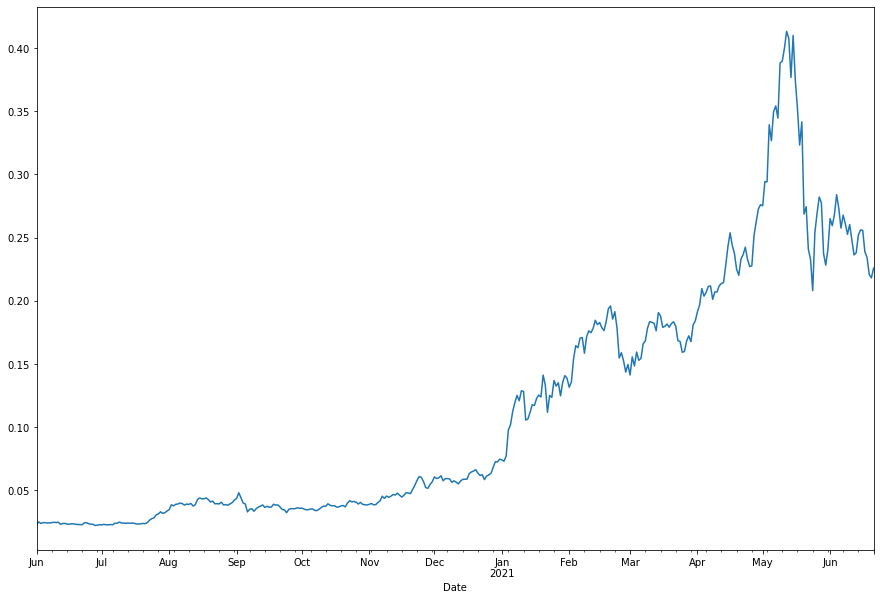

In [5]:
df['ClosingPrice'].plot(kind='line',figsize=(15, 10))

plt.show()

# 2. Tiền xử lý và Chia train/test

#### 2.1 Bình thường hóa dữ liệu

In [6]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [7]:
norm_data = min_max_scaler.fit_transform(df)

#### 2.2 Chi dữ liệu train test theo tỉ lệ train: 80%, test: 20%

In [8]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

In [9]:
price = df[['ClosingPrice']]

In [10]:
price = np.array(price)
price

array([[0.02312504],
       [0.02500599],
       [0.02373091],
       [0.02445194],
       [0.02434133],
       [0.02407664],
       [0.02423214],
       [0.02438257],
       [0.02470408],
       [0.02445429],
       [0.02474454],
       [0.02305056],
       [0.02372197],
       [0.02382201],
       [0.02326133],
       [0.0231255 ],
       [0.02347509],
       [0.0234031 ],
       [0.02318059],
       [0.02288903],
       [0.02287452],
       [0.02276155],
       [0.02432282],
       [0.02429271],
       [0.02351757],
       [0.02325691],
       [0.02299451],
       [0.02214079],
       [0.02241848],
       [0.02283333],
       [0.02259468],
       [0.02307049],
       [0.0226723 ],
       [0.02263593],
       [0.02288072],
       [0.02270958],
       [0.02389297],
       [0.0238434 ],
       [0.02482819],
       [0.02417872],
       [0.02401468],
       [0.02389943],
       [0.02402237],
       [0.02393273],
       [0.02408414],
       [0.02384254],
       [0.02330853],
       [0.023

In [11]:
train, test = price[0:train_size,:], price[train_size:len(norm_data),:]
print(len(train), len(test))

308 78


# 3. Thực hiện mô hình ARIMA

In [12]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [13]:
arima_model = arimamodel(train)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2385.344, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2388.668, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2387.345, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2387.338, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2386.301, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.945 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  308
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1196.334
Date:                Tue, 22 Jun 2021   AIC                          -2388.668
Time:                        09:52:33   BIC                          -2381.215
Sample:                             0   HQIC                         -2385.688
                                - 308                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.000      2.088      0.037    3.61e-05       0.001
sigma2      2.414e-05   9.58e-07     25.201      0.000    2.23e-05     2.6e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):               518.75
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):              29.09   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
ARIMA_predict = arima_model.predict(len(test))

# 4. Đánh giá mô hình ARIMA

In [15]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
#MAPE
mean_absolute_percentage_error(test, ARIMA_predict.reshape(-1,1))

14.736959944040498

In [17]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test, ARIMA_predict.reshape(-1,1))
RMSE = math.sqrt(MSE)
print(RMSE)

0.07060597827899714
